# Feature Transformation

In [15]:
import seaborn as sns

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
titanic_df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
import seaborn as sns

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Selecting only the specified columns
selected_columns = ['pclass', 'age', 'fare', 'survived']
df = titanic_df[selected_columns]

# Renaming the columns to match the specified names
df.columns = ['Pclass', 'Age', 'Fare', 'Survived']

# Display the first few rows of the selected dataset
df


,Pclass,Age,Fare,Survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0
...,...,...,...,...
886,2,27.0,13.0000,0
887,1,19.0,30.0000,1
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [8]:
df['Age'].fillna(df.Age.median(), inplace=True)


/var/folders/kt/gtc2z47j3tg1c1zql3wbltzw0000gn/T/ipykernel_6293/3299610451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df.Age.median(), inplace=True)


In [14]:
df.isnull().sum()

Pclass        0
Age         177
Fare          0
Survived      0
dtype: int64

In [19]:
### split independent and dependent feature
# Features (X)
X = df[['Pclass', 'Age', 'Fare']]

# Target variable (y)
y = df['Survived']


In [22]:
# Features (X)
X


,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,NaN,23.4500
889,1,26.0,30.0000


In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
#training and testing the data before that we need to do feature scaling(standardization,normalization)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
X_train

,Pclass,Age,Fare
6,1,54.0,51.8625
718,3,NaN,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,NaN,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [29]:
 # feature scaling 
    
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)

# fit - why we are using split means it will do mean, neu, standrad deviation for the the each values by using "transform"- it will substitute as a formula and give the ans

In [30]:
X_train_scaled

array([[-1.62580285,  1.69460589,  0.38784185],
       [ 0.80576177,         nan, -0.31908053],
       [-0.41002054, -0.3133837 ,  0.18792449],
       ...,
       [ 0.80576177,  0.79447262, -0.34613654],
       [-1.62580285, -1.07503492,  1.71250117],
       [-1.62580285, -0.59034778,  0.8821286 ]])

In [ ]:
#testing 

In [31]:
# here dont need to use fit again bcoz its already done in a training data
X_test_scaled=scaler.transform(X_test)


In [32]:

X_test_scaled

array([[ 0.80576177,         nan, -0.32402243],
       [-0.41002054,  0.10206242, -0.4162854 ],
       [ 0.80576177, -0.6595888 , -0.46634591],
       [-0.41002054, -1.62896308,  0.0211365 ],
       [ 0.80576177, -1.07503492, -0.40186603],
       [-1.62580285, -0.24414268,  0.91250512],
       [ 0.80576177,         nan, -0.46974808],
       [ 0.80576177, -0.93655288, -0.2704781 ],
       [ 0.80576177, -0.93655288, -0.46974808],
       [-1.62580285, -0.72882982, -0.10944269],
       [-1.62580285,  0.51750854,  0.41190006],
       [ 0.80576177,  1.00219569, -0.46391578],
       [ 0.80576177,         nan, -0.12531819],
       [ 0.80576177,  0.0328214 , -0.47995459],
       [-0.41002054,  0.44826752, -0.36768297],
       [-1.62580285, -0.93655288,  0.14555873],
       [-1.62580285,  0.86371365,  0.40128918],
       [ 0.80576177,         nan, -0.46820835],
       [-0.41002054, -0.17490166, -0.36768297],
       [-1.62580285,  1.20991875,  0.39051499],
       [ 0.80576177, -0.38262472, -0.466

In [ ]:
#use machine algorithm (model building)


In [37]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline for preprocessing
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize features
])

# Fit and transform the preprocessing pipeline on your features (X_train)
X_train_processed = preprocessor.fit_transform(X_train)

# Now, use X_train_processed for training your model
classification.fit(X_train_processed, y_train)


LogisticRegression()

In [41]:
# Preprocess the test data using the same preprocessing pipeline
X_test_processed = preprocessor.transform(X_test)

# Now, use X_test_processed for making predictions
predictions = classification.predict(X_test_processed)
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

Guassian distribution : convert any other distribution in to an gaussian distribution bcoz of the we can get the 'Accuracy' by appling ml algotithms


Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

1.logarithmic transformation
2.reciprocal transformation
3.square root transformation
4.exponential transformation (more general, you can use any exponent)
5.boxcox transformation

In [42]:
# Create a new DataFrame df1 with selected columns
df1 = df[['Age', 'Fare', 'Survived']]

# Display the first few rows of df1
df1.head()


,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [43]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [44]:
df.isnull().sum()

Pclass      0
Age         0
Fare        0
Survived    0
dtype: int64

 If you want to check whether feature is guassian or normal distributed
 "Q-Q plot"

In [45]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 

If the p-value (result.pvalue) is greater than a chosen significance level (commonly 0.05), we fail to reject the null hypothesis. This suggests that the data in that particular column of df1 is likely normally distributed.
If the p-value is less than the significance level, we reject the null hypothesis, indicating that the data does not follow a normal distribution.
By performing the Shapiro-Wilk test on each column of df1, the code helps in assessing whether the assumptions of normality hold for each feature (column) in your dataset. This information is crucial for deciding whether parametric statistical tests and models that assume normality are appropriate for further analysis.






/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Shapiro-Wilk test results:
Age: W-statistic = nan, p-value = 1.0000
Fare: W-statistic = 0.5219, p-value = 0.0000
Survived: W-statistic = 0.6167, p-value = 0.0000

D'Agostino's K^2 test results:
Age: statistic = nan, p-value = nan
Fare: statistic = 904.5873, p-value = 0.0000
Survived: statistic = 4070.9171, p-value = 0.0000


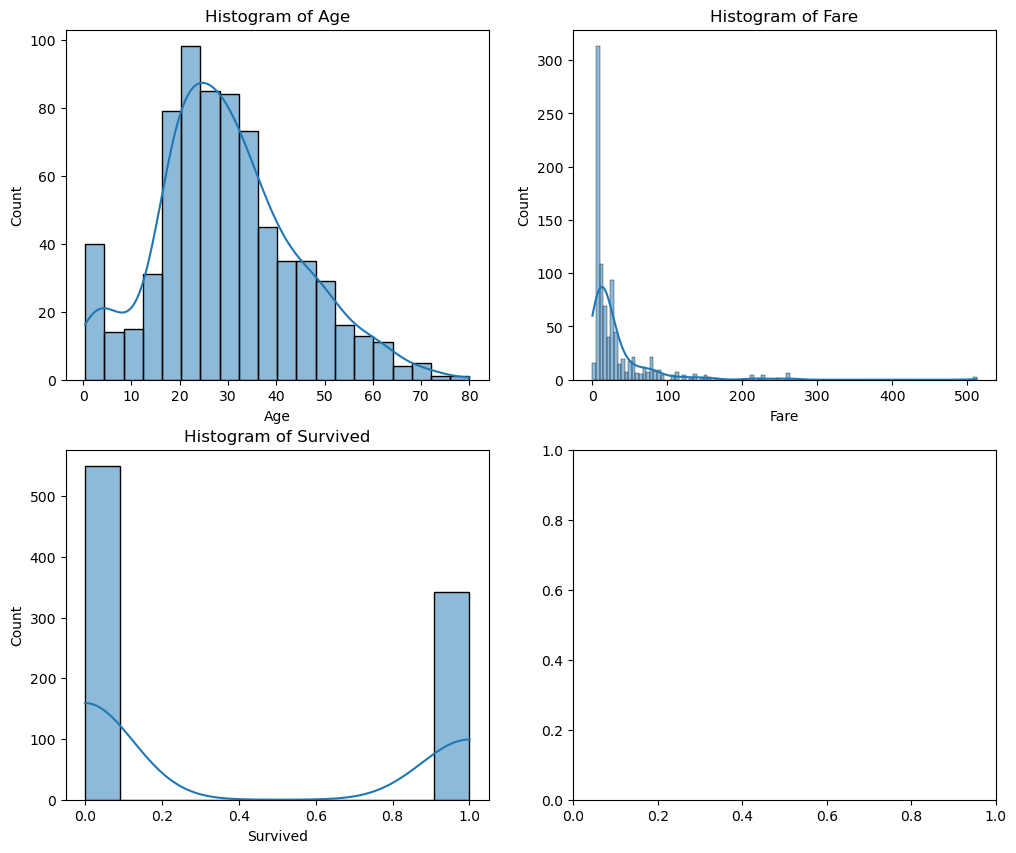

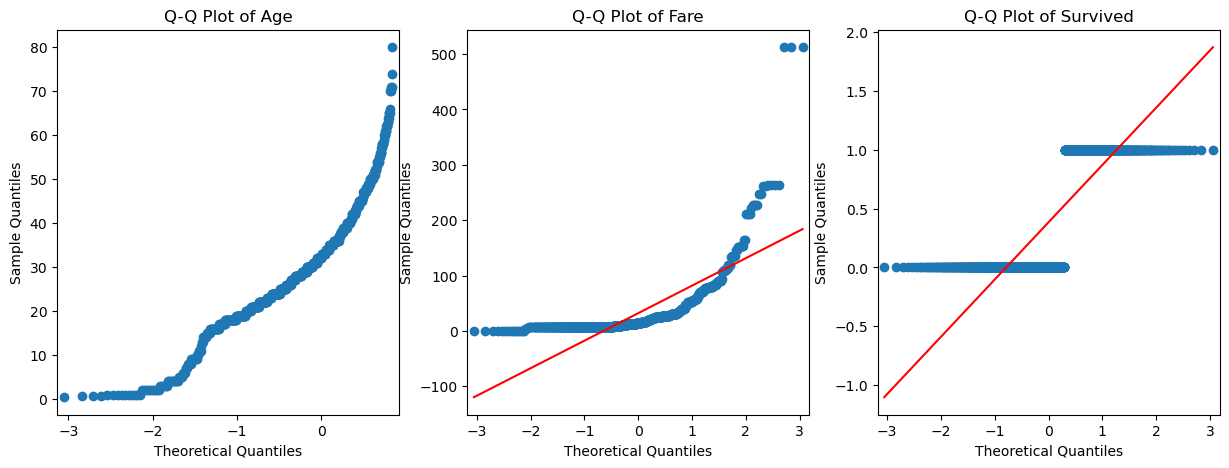

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest
import statsmodels.api as sm

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot histograms for each column
for i, column in enumerate(df1.columns):
    sns.histplot(df1[column], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Histogram of {column}')

# Plot Q-Q plots for each column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, column in enumerate(df1.columns):
    sm.qqplot(df1[column], line='s', ax=axes[i])  # Corrected the function call
    axes[i].set_title(f'Q-Q Plot of {column}')

# Perform Shapiro-Wilk test
shapiro_results = {column: shapiro(df1[column]) for column in df1.columns}
print("Shapiro-Wilk test results:")
for column, result in shapiro_results.items():
    print(f"{column}: W-statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")

# Perform D'Agostino's K^2 test
dagostino_results = {column: normaltest(df1[column]) for column in df1.columns}
print("\nD'Agostino's K^2 test results:")
for column, result in dagostino_results.items():
    print(f"{column}: statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")

plt.show()


# qq plot says whether which gausin distribution is better " according to values lying on the straight line"


In [51]:

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

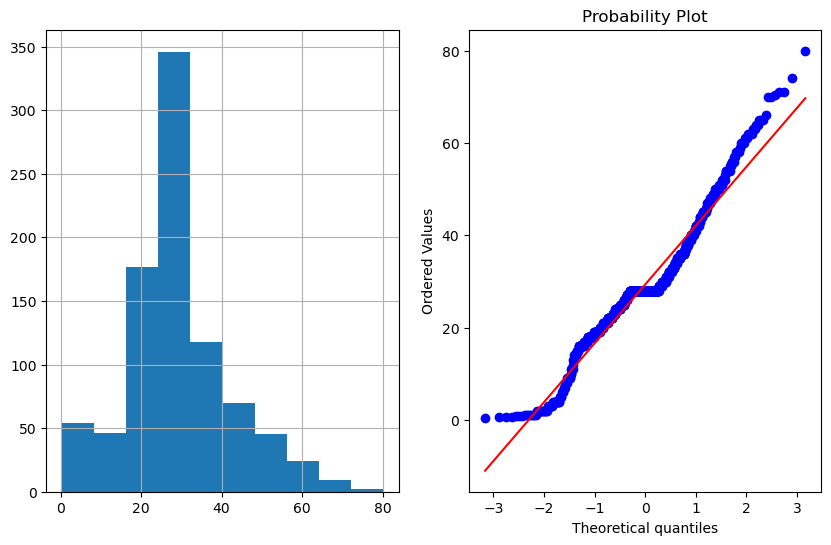

In [52]:
plot_data(df,'Age')

# logarithimic transformation


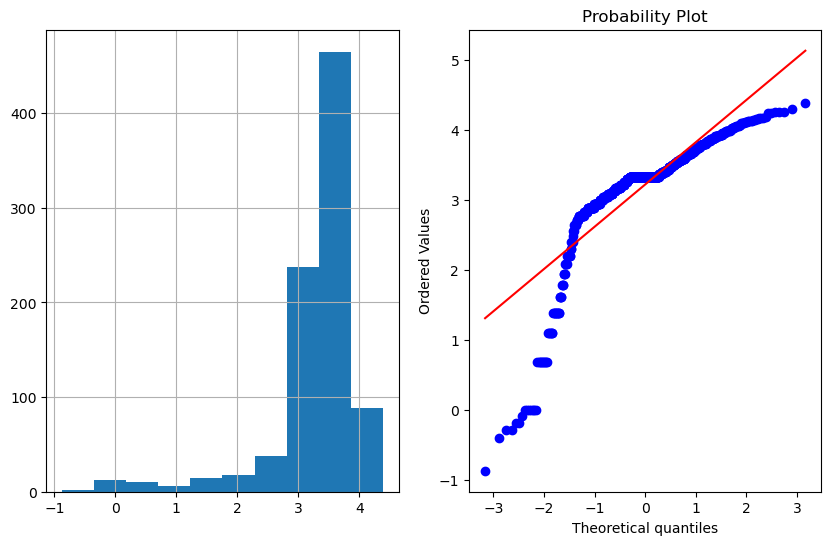

In [53]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

# square root transformation

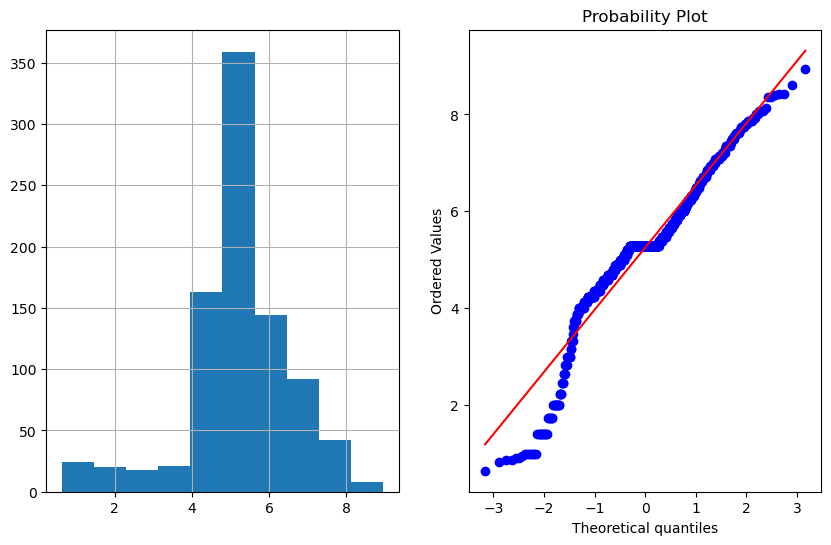

In [54]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

# reciprocal transformation

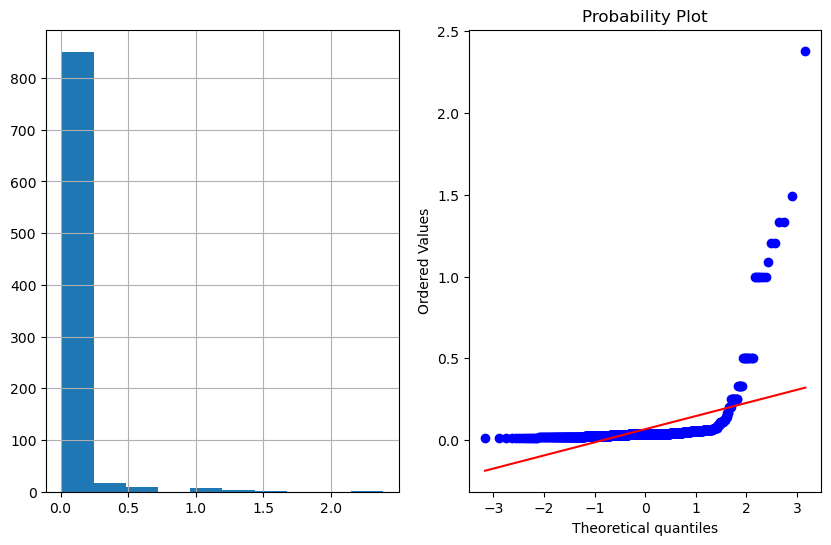

In [56]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

# exponential transformation

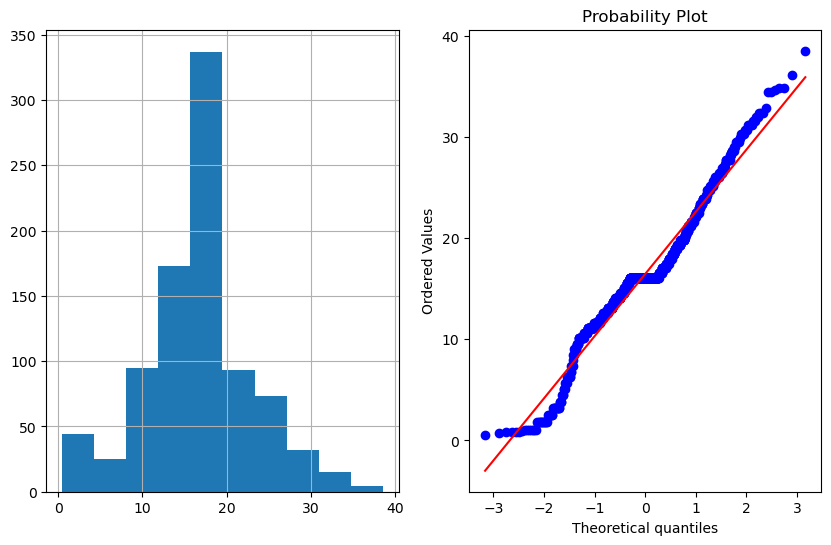

In [57]:
#### Exponential Transdormation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

# boxcox transormation

In [58]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])
print(parameters)


0.7964531828049825


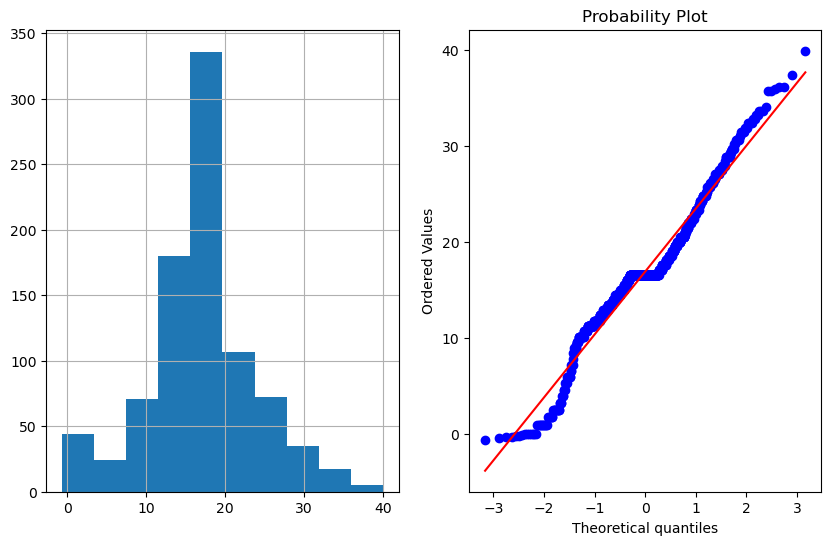

In [60]:
plot_data(df,'Age_Boxcox')

# fare transformation

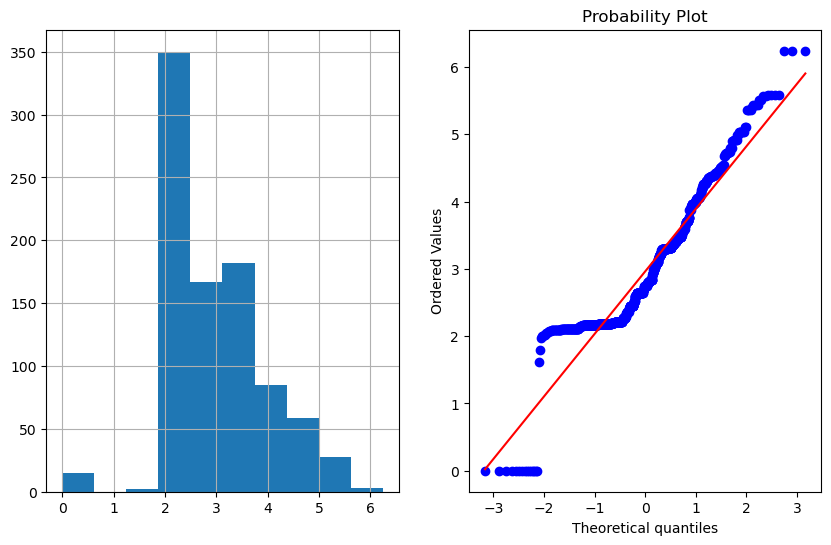

In [61]:
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

analyse says that "boxcox" and "exponential" tra